In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import set_config
set_config(display='diagram')

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
#loading dataset
df = pd.read_csv(r"E:\VS Code\Grand_Project\data\credit_risk.csv")

Column Descriptions:

* ID: Unique identifier for each loan applicant.
* Age: Age of the loan applicant.
* Income: Income of the loan applicant.
* Home: Home ownership status (Own, Mortgage, Rent).
* Emp_Length: Employment length in years.
* Intent: Purpose of the loan (e.g., education, home improvement).
* Amount: Loan amount applied for.
* Rate: Interest rate on the loan.
* Status: Loan approval status (Fully Paid, Charged Off, Current).
* Percent_Income: Loan amount as a percentage of income.
* Default: Whether the applicant has defaulted on a loan previously (Yes, No).
* Cred_Length: Length of the applicant's credit history.

In [3]:
# Checking how dataset looks
df.head(10)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
5,5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2
6,6,26,77100,RENT,8.0,EDUCATION,35000,12.42,1,0.45,N,3
7,7,24,78956,RENT,5.0,MEDICAL,35000,11.11,1,0.44,N,4
8,8,24,83000,RENT,8.0,PERSONAL,35000,8.90,1,0.42,N,2
9,9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3


In [4]:
# checking shape of our dataset
df.shape

(32581, 12)

## Our dataset have many rows 32581 which is considered a normal dataset for study purpose.

In [5]:
# using info function to check types of columns and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


## We have null values in 2 columns

In [6]:
# Finding value of null values
df.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

<Axes: >

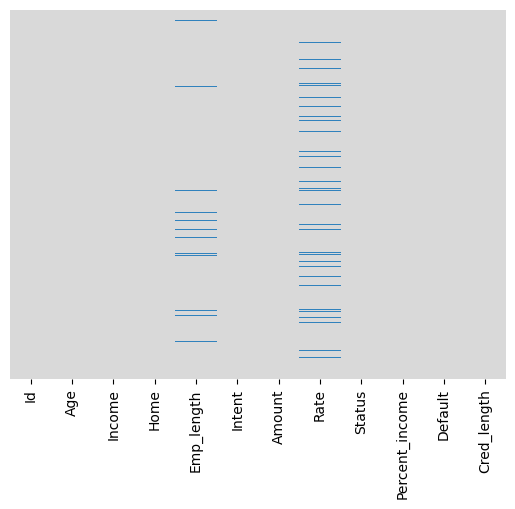

In [7]:
# Visualizing null values using heatmap
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r' )

In [8]:
# Checking percentage of null values
null_values = (df.isnull().sum() / len(df)) * 100
null_values

Id                0.000000
Age               0.000000
Income            0.000000
Home              0.000000
Emp_length        2.747000
Intent            0.000000
Amount            0.000000
Rate              9.563856
Status            0.000000
Percent_income    0.000000
Default           0.000000
Cred_length       0.000000
dtype: float64

since we dont have higher percentage of null values we can easily drop them

In [9]:
# checking if dataset have any duplicate values
num_duplicate_rows = df.duplicated().sum()
num_duplicate_rows

0

## Checking distribution of the dataset columns

C:\Users\LAPTOP LAB\AppData\Local\Temp\ipykernel_12024\3307263666.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\LAPTOP LAB\AppData\Local\Temp\ipykernel_12024\3307263666.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\LAPTOP LAB\AppData\Local\Temp\ipykernel_12024\3307263666.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\LAPTOP LAB\AppData\Local\Temp\ipykernel_12024\3307263666.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\LAPTOP LAB\AppData\Local\Temp\ipykernel_12024\3307263666.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\LAPTOP LAB\AppData\Local\Temp\ipykernel_12024\3307263666.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\LAPTOP LAB\AppData\Local\Temp\ipykernel_12024\3307263666.py:14: UserWarning: The figure layout has changed to tight

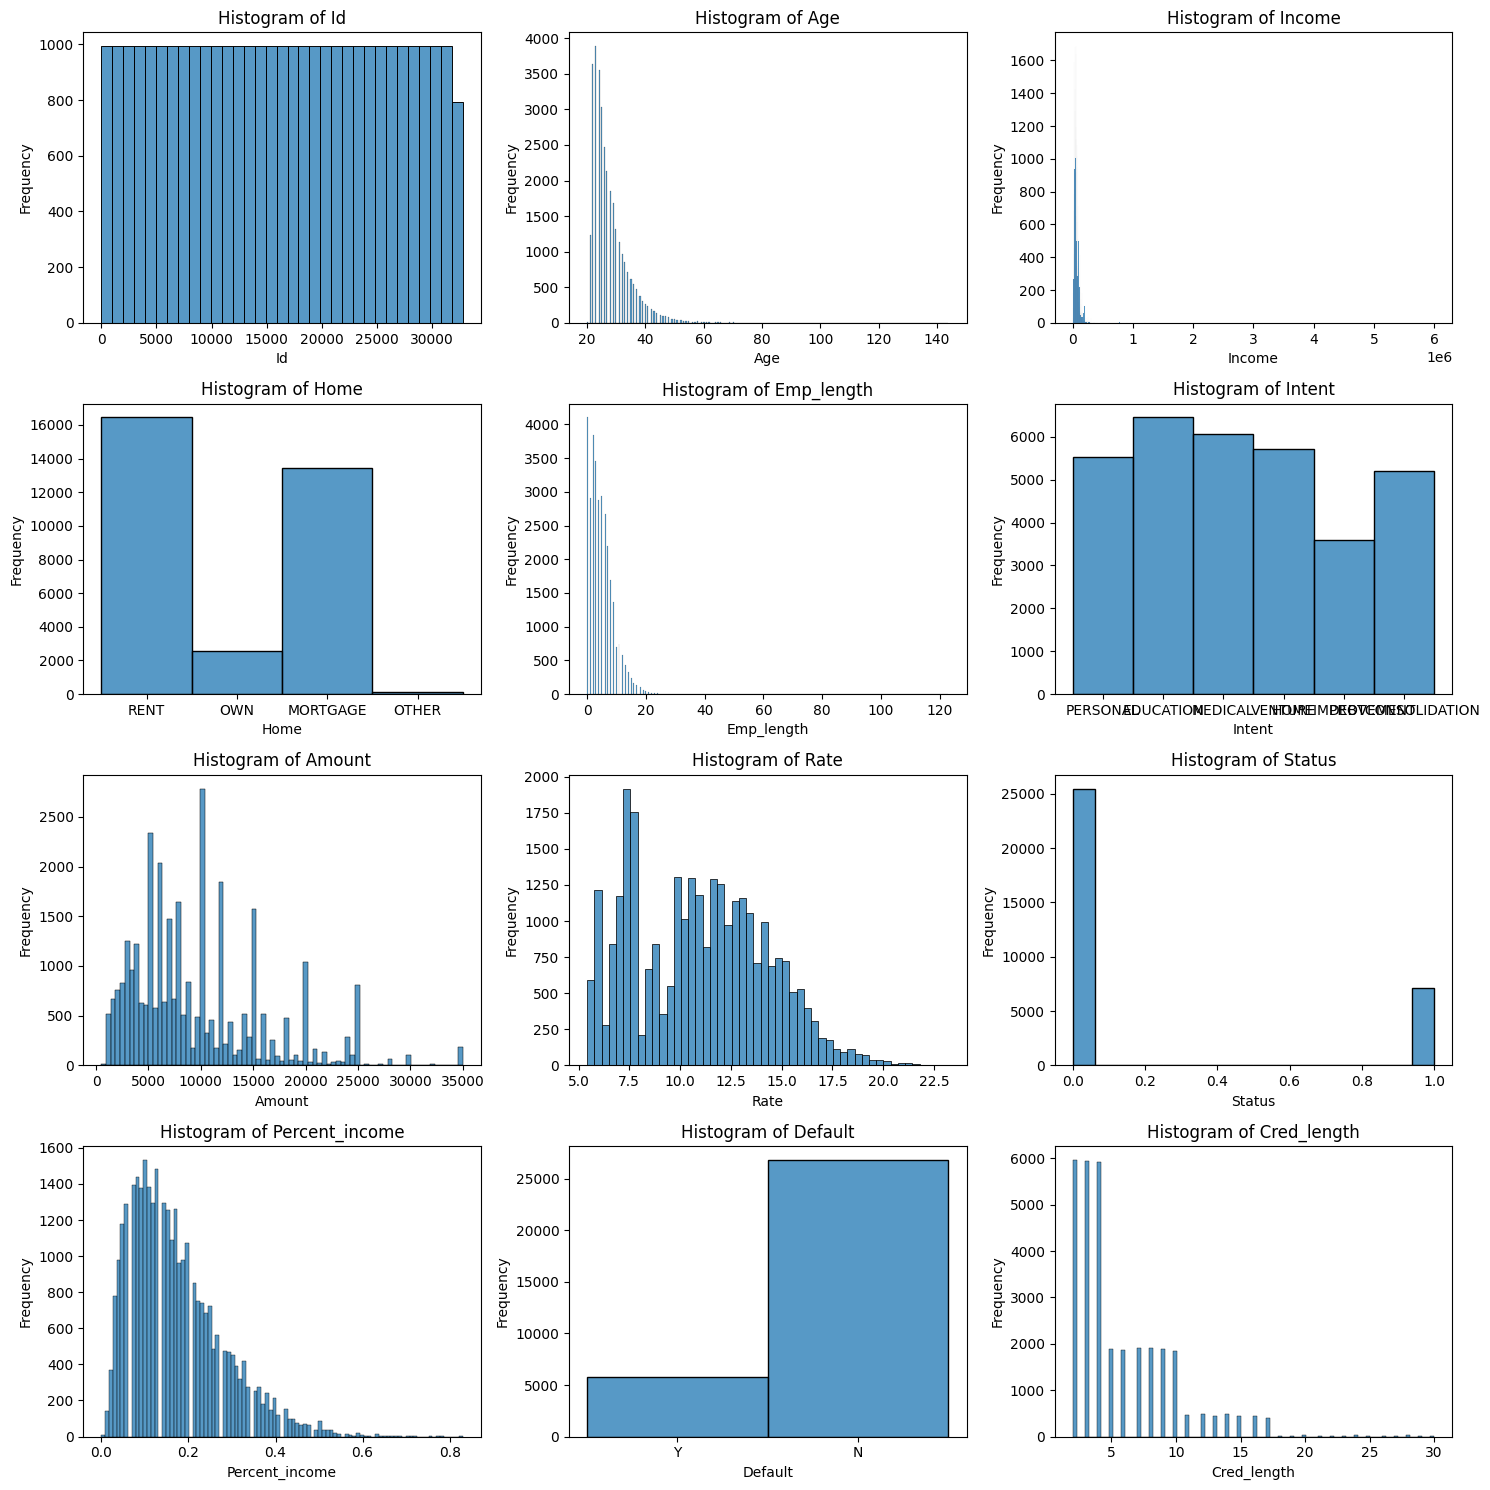

In [10]:
# Get all columns
columns = df.columns

# Set the figure size
plt.figure(figsize=(15, 15))

# Loop through each column and plot the histogram
for i, col in enumerate(columns):
    plt.subplot(4, 3, i + 1)  # Subplot arrangement with 4 rows and 3 columns for better visualization
    sns.histplot(df[col])
    plt.title(f'Histogram of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.tight_layout()

# Show the plot
plt.show()

## Most of the numerical columns are skewed and target variable have binary values that are imbalance as well

In [11]:
#Finding unique values in columns
df.nunique()

Id                32581
Age                  58
Income             4295
Home                  4
Emp_length           36
Intent                6
Amount              753
Rate                348
Status                2
Percent_income       77
Default               2
Cred_length          29
dtype: int64

## Data is diverse

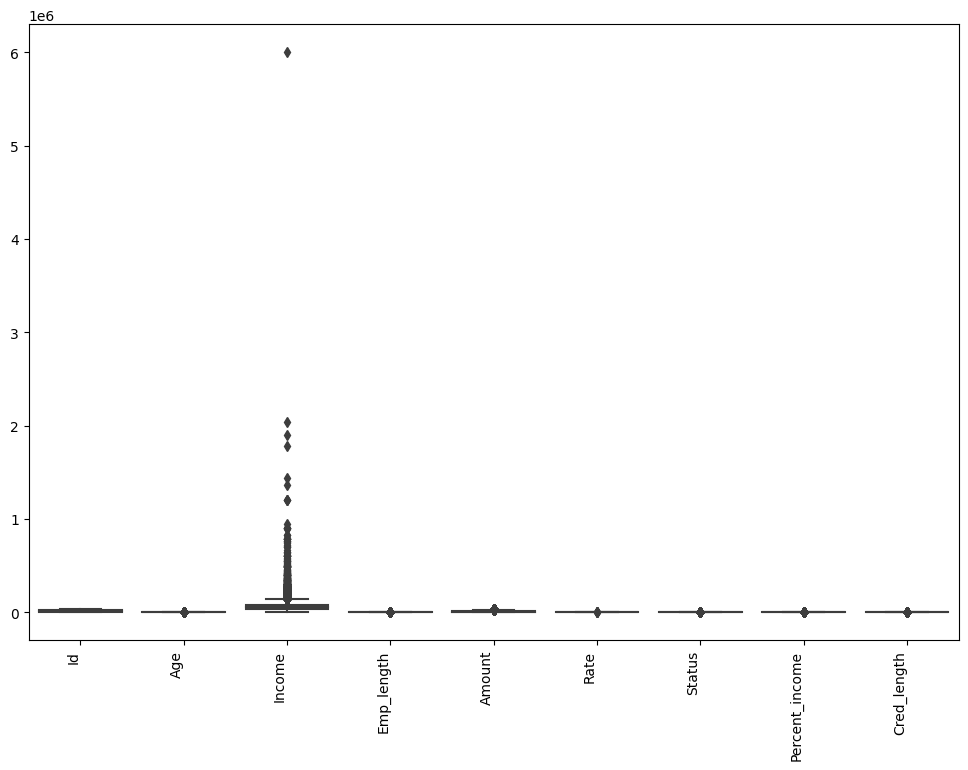

In [12]:
#Finding outliers using boxplot
plt.subplots(figsize=(12, 8))
sns.boxplot(data=df, orient='v')
plt.xticks(rotation=90, ha='right')
plt.show()

In [13]:
#Since Id column isn't useful we will drop it
df.drop(columns=["Id","Cred_length"],axis=1, inplace = True)

In [14]:
# Finding min, max and mean values to understand how numerical values are distributed
df.describe()

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000


In [15]:
# Finding rows that have higher than 60000000 income
specific_row = df[df['Income'] >= 6000000]
specific_row

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default
32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.73,0,0.0,N


In [16]:
# Finding rows that have higher than 20000000 income
specific_row = df[df['Income'] >= 2000000]
specific_row

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default
30049,42,2039784,RENT,0.0,VENTURE,8450,12.29,0,0.0,Y
32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.73,0,0.0,N


## There is only one row with 6000000 value as income and Age is 144 for this row as well, whole row could be a human error we will remove it as its way faraway from rest of the points in dataset.

In [17]:
# Removing row with 6000000 value
df = df[df['Income'] < 6000000]

In [18]:
# Finding rows that have higher than 90 Age
specific_row = df[df['Age'] >= 90]
specific_row

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default
81,144,250000,RENT,4.0,VENTURE,4800,13.57,0,0.02,N
183,144,200000,MORTGAGE,4.0,EDUCATION,6000,11.86,0,0.03,N
575,123,80004,RENT,2.0,EDUCATION,20400,10.25,0,0.25,N
747,123,78000,RENT,7.0,VENTURE,20000,NaN,0,0.26,N
32416,94,24000,RENT,1.0,MEDICAL,6500,NaN,0,0.27,N


In [19]:
# Removing row with 90+ Age
df = df[df['Age'] < 90]

In [20]:
# Finding rows that have higher than 60 employment length
specific_row = df[df['Emp_length'] >= 60]
specific_row

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y
210,21,192000,MORTGAGE,123.0,VENTURE,20000,6.54,0,0.10,N


In [21]:
# Removing row with 100+ Emp_length
df = df[df['Emp_length'] < 100]

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,31678.0,27.728581,6.202358,20.00,23.00,26.00,30.00,84.00
Income,31678.0,66491.440495,52769.086293,4000.00,39396.00,56000.00,80000.00,2039784.00
Emp_length,31678.0,4.782183,4.034956,0.00,2.00,4.00,7.00,41.00
Amount,31678.0,9660.062188,6334.435654,500.00,5000.00,8000.00,12500.00,35000.00
Rate,28632.0,11.039701,3.229409,5.42,7.90,10.99,13.48,23.22
Status,31678.0,0.215449,0.411140,0.00,0.00,0.00,0.00,1.00
Percent_income,31678.0,0.169607,0.106269,0.00,0.09,0.15,0.23,0.83


In [23]:
# Finding rows that have 0 value
specific_row = df[df['Percent_income'] == 0 ]
specific_row

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default
17834,34,948000,MORTGAGE,18.0,PERSONAL,2000,9.99,0,0.0,N
18917,35,510000,RENT,1.0,PERSONAL,1800,13.48,0,0.0,N
27877,30,522000,MORTGAGE,11.0,HOMEIMPROVEMENT,2500,7.43,0,0.0,N
30049,42,2039784,RENT,0.0,VENTURE,8450,12.29,0,0.0,Y
31916,43,780000,MORTGAGE,2.0,HOMEIMPROVEMENT,1000,8.94,0,0.0,N
31922,47,1362000,MORTGAGE,9.0,VENTURE,6600,7.74,0,0.0,N
31924,44,1440000,MORTGAGE,7.0,DEBTCONSOLIDATION,6400,7.40,0,0.0,N
32546,60,1900000,MORTGAGE,5.0,PERSONAL,1500,NaN,0,0.0,N


## Only 7 rows have 0 value so we can remove it

In [24]:
# Removing row with 0 values in Percent_income
df = df[df['Percent_income'] > 0]

In [25]:
# Finding rows that have 0 value in Employment length
specific_row = df[df['Emp_length'] == 0]
specific_row

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default
16,23,120000,RENT,0.0,EDUCATION,35000,7.90,0,0.29,N
23,24,10980,OWN,0.0,PERSONAL,1500,7.29,0,0.14,N
27,23,11000,OWN,0.0,PERSONAL,1400,9.32,0,0.13,N
45,26,300000,MORTGAGE,0.0,EDUCATION,25000,15.33,0,0.08,N
49,26,89028,RENT,0.0,DEBTCONSOLIDATION,30000,6.62,1,0.34,N
...,...,...,...,...,...,...,...,...,...,...
32563,52,71520,RENT,0.0,EDUCATION,7000,16.82,1,0.10,Y
32564,53,45000,RENT,0.0,PERSONAL,5600,13.79,0,0.12,N
32572,52,52000,OWN,0.0,PERSONAL,9600,8.49,0,0.18,N
32573,56,90000,MORTGAGE,0.0,PERSONAL,7200,6.17,0,0.08,N


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,31670.0,27.725008,6.197508,20.00,23.00,26.00,30.00,84.00
Income,31670.0,66208.211809,48889.154819,4000.00,39329.25,56000.00,80000.00,1782000.00
Emp_length,31670.0,4.781718,4.034366,0.00,2.00,4.00,7.00,41.00
Amount,31670.0,9661.547206,6334.401178,500.00,5000.00,8000.00,12500.00,35000.00
Rate,28625.0,11.040051,3.229533,5.42,7.90,10.99,13.48,23.22
Status,31670.0,0.215504,0.411178,0.00,0.00,0.00,0.00,1.00
Percent_income,31670.0,0.169650,0.106248,0.01,0.09,0.15,0.23,0.83


In [27]:
df.shape

(31670, 10)

In [28]:
df.head(10)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y
5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N
6,26,77100,RENT,8.0,EDUCATION,35000,12.42,1,0.45,N
7,24,78956,RENT,5.0,MEDICAL,35000,11.11,1,0.44,N
8,24,83000,RENT,8.0,PERSONAL,35000,8.90,1,0.42,N
9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N
10,22,85000,RENT,6.0,VENTURE,35000,10.37,1,0.41,N


<Axes: ylabel='count'>

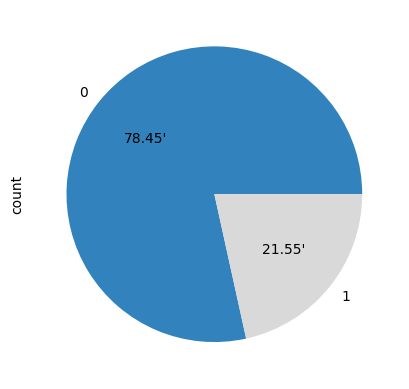

In [29]:
df["Status"].value_counts().plot(kind="pie", autopct ="%.2f'", cmap= 'tab20c')

<Axes: xlabel='Home', ylabel='count'>

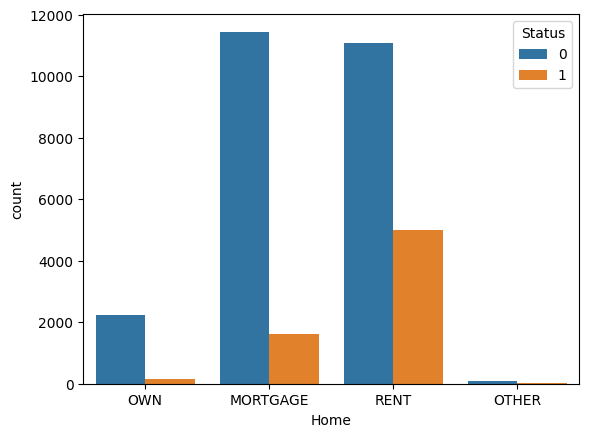

In [30]:
# Relationship between Home and Default
sns.countplot(x='Home', hue='Status' , data=df)

In [31]:
# Relationship between Home and Status in percentage
grouped_data = df.groupby('Status')['Home'].value_counts(normalize=True).unstack(fill_value=0) * 100
grouped_data

Home,MORTGAGE,OTHER,OWN,RENT
Status,,,,
0,46.101831,0.297847,9.027973,44.572349
1,23.882784,0.483516,2.446886,73.186813


<Axes: xlabel='Intent', ylabel='count'>

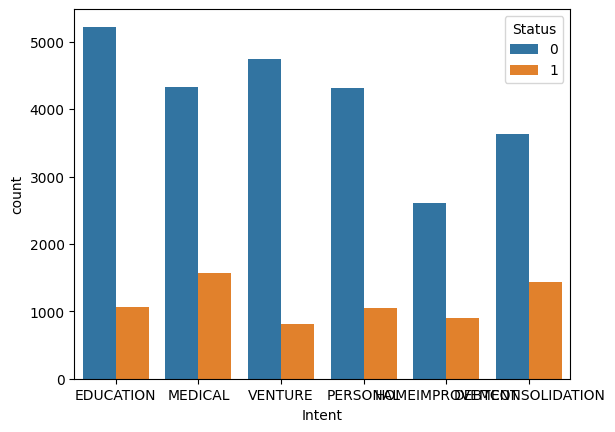

In [32]:
# Relationship between Intent and status
sns.countplot(x='Intent', hue='Status' , data=df)

In [33]:
# Relationship between Intent and Status in percentage
grouped_data = df.groupby('Status')['Intent'].value_counts(normalize=True).unstack(fill_value=0) * 100
grouped_data

Intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
Status,,,,,,
0,14.594486,21.018314,10.509157,17.432079,17.379754,19.066211
1,21.054945,15.619048,13.142857,22.930403,15.326007,11.926740


<Axes: xlabel='Status', ylabel='count'>

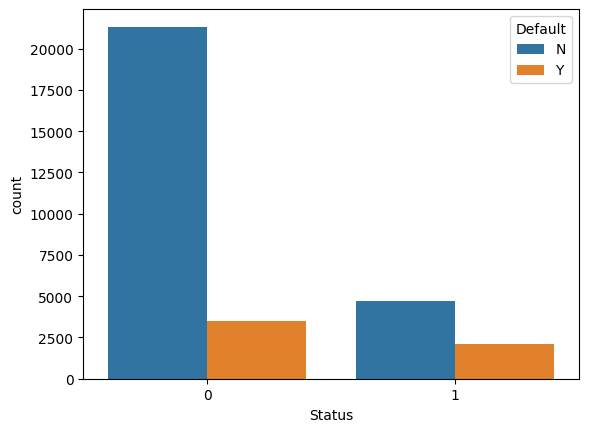

In [34]:
# Relationship between Status and Default
sns.countplot(x='Status', hue='Default' , data=df)

In [35]:
# Relationship between Status and Default in percentage
grouped_data = df.groupby('Status')['Default'].value_counts(normalize=True).unstack(fill_value=0) * 100
grouped_data

Default,N,Y
Status,,
0,85.860334,14.139666
1,69.025641,30.974359


<Axes: xlabel='Status', ylabel='Rate'>

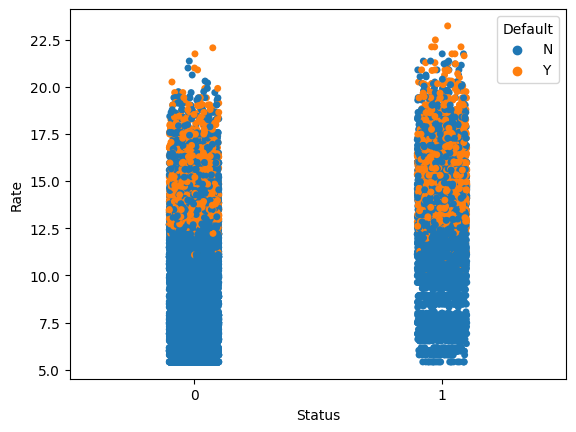

In [36]:
# Relationship of Rate with Default and Status
sns.stripplot(x='Status', y='Rate', hue='Default', data=df)

<Axes: xlabel='Status', ylabel='Percent_income'>

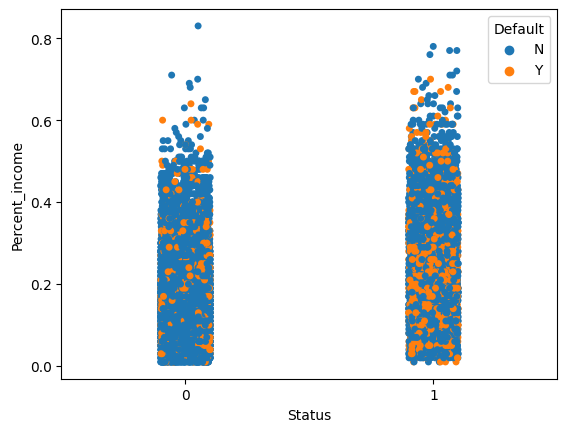

In [37]:
# Relationship of Percent Income with Default and Status
sns.stripplot(x='Status', y='Percent_income', hue='Default', data=df)

<Axes: xlabel='Status', ylabel='Amount'>

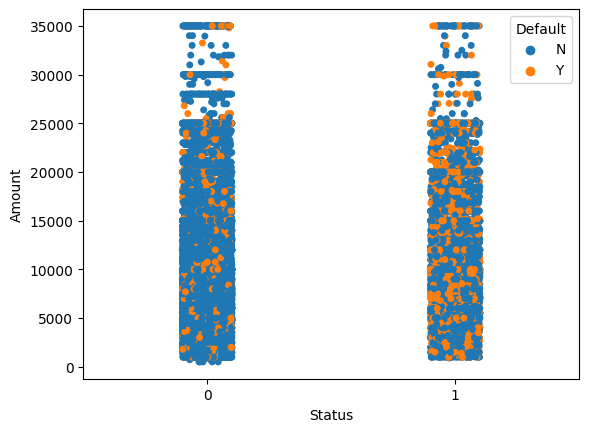

In [38]:
# Relationship of Amount with Default and Status
sns.stripplot(x='Status', y='Amount', hue='Default', data=df)

<Axes: xlabel='Status', ylabel='Income'>

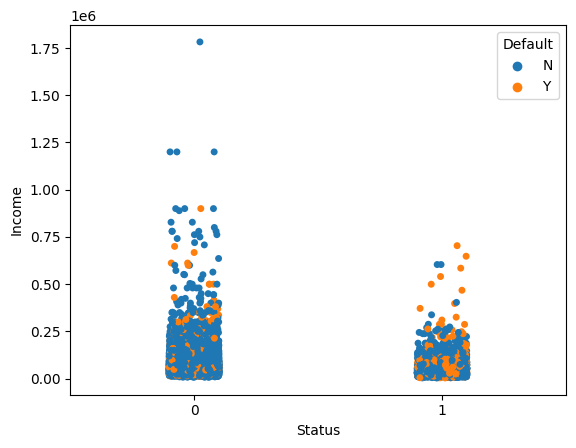

In [39]:
# Relationship of Income with Default and Status
sns.stripplot(x='Status', y='Income', hue='Default', data=df)

<Axes: xlabel='Status', ylabel='Age'>

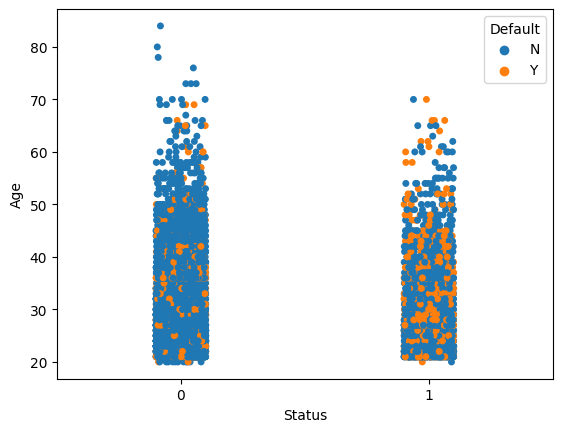

In [40]:
# Relationship of Age with Default and Status
sns.stripplot(x='Status', y='Age', hue='Default', data=df)

In [41]:
#splitting dataset into train and test
X = df.drop('Status', axis = 1) # grabs everything else but 'Default'
y = df['Status'] # y is the column we're trying to predict

In [42]:
X

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0.10,N
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,0.57,N
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,0.53,N
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,0.55,Y
5,21,9900,OWN,2.0,VENTURE,2500,7.14,0.25,N
...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0.11,N
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0.15,N
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,0.46,N
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0.10,N


In [43]:
y

1        0
2        1
3        1
4        1
5        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: Status, Length: 31670, dtype: int64

In [44]:
# Splitting dataset into train and test for training model
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [45]:
## numerical processing pipeline
numeric_processor=Pipeline(
    steps=[("imputation_mean",SimpleImputer(missing_values=np.nan,strategy="mean")),
          ("scaler",StandardScaler())]
)

In [46]:
categorical_processor=Pipeline(
    steps=[("imputation_consatnt",SimpleImputer(fill_value="missing",strategy="constant")),
          ("onehot",OneHotEncoder(handle_unknown="ignore", drop='first'))]

)

In [47]:
preprocessor=ColumnTransformer(
    [("categorical",categorical_processor,["Home","Intent","Default"]),
    ("numerical",numeric_processor,["Rate","Emp_length"])]


)

In [48]:
pipe1=make_pipeline(preprocessor,LogisticRegression())
pipe2=make_pipeline(preprocessor,DecisionTreeClassifier())
pipe3=make_pipeline(preprocessor,RandomForestClassifier())
pipe4=make_pipeline(preprocessor,GradientBoostingClassifier())

# **1. LOGISTIC REGRESSION**

## **Model Training**

In [49]:
# train
pipe1.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Home', 'Intent',
                                                   'Default']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Rate', 'Emp_length'])])),
                ('logisticregression', LogisticRegression())])

## **Model Evaluation**

Accuracy 0.81 %
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4963
           1       0.68      0.25      0.36      1371

    accuracy                           0.81      6334
   macro avg       0.75      0.61      0.63      6334
weighted avg       0.79      0.81      0.78      6334

[[4803  160]
 [1031  340]]


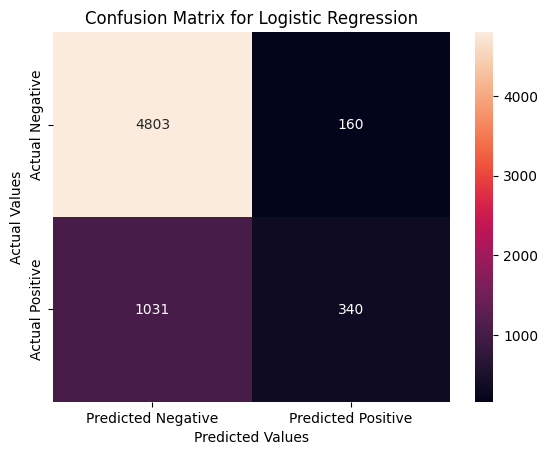

In [50]:
y_pred_log_reg = pipe1.predict(x_test)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg),2)
print('Accuracy', log_reg_accuracy,'%')

classification_rep = classification_report(y_test, y_pred_log_reg)
print("Classification Report:\n", classification_rep)

confusion = confusion_matrix(y_test, y_pred_log_reg)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

# **2. DECISION TREE**

## **Model Training**

In [51]:
# train
pipe2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Home', 'Intent',
                                                   'Default']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Rate', 'Emp_length'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

## **Model Evalution**

Accuracy 0.79 %
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      4963
           1       0.53      0.40      0.46      1371

    accuracy                           0.79      6334
   macro avg       0.69      0.65      0.66      6334
weighted avg       0.78      0.79      0.78      6334

[[4477  486]
 [ 823  548]]


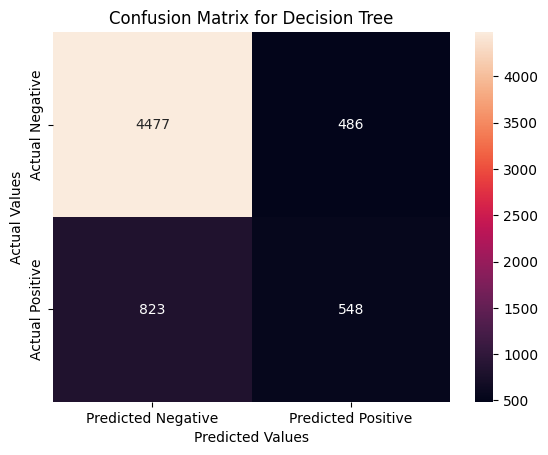

In [52]:
y_pred_Dtree = pipe2.predict(x_test)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) ,2)
print('Accuracy', Dtree_accuracy,'%')

classification_rep = classification_report(y_test, y_pred_Dtree)
print("Classification Report:\n", classification_rep)

confusion = confusion_matrix(y_test, y_pred_Dtree)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

# **3. RANDOM FOREST**

## **Model Training**

In [53]:
# train
pipe3.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Home', 'Intent',
                                                   'Default']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Rate', 'Emp_length'])])),
                ('randomforestclassifier', RandomForestClassifier())])

## **Model Evaluation**

Accuracy 79.54 %
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      4963
           1       0.54      0.38      0.45      1371

    accuracy                           0.80      6334
   macro avg       0.69      0.65      0.66      6334
weighted avg       0.78      0.80      0.78      6334

[[4516  447]
 [ 849  522]]


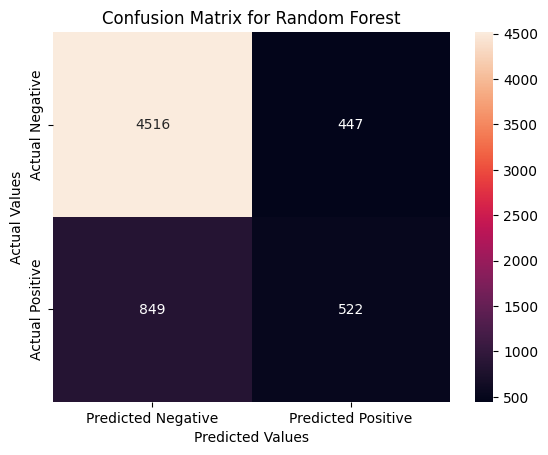

In [54]:
y_pred_rfc = pipe3.predict(x_test)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

classification_rep = classification_report(y_test, y_pred_rfc)
print("Classification Report:\n", classification_rep)

confusion = confusion_matrix(y_test, y_pred_rfc)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

# **4. GRADIENT BOOSTING CLASSIFIER**

## **Model Training**

In [55]:
# train
pipe4.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Home', 'Intent',
                                                   'Default']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Rate', 'Emp_length'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

## **Model Evalution**

Accuracy 0.83 %
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      4963
           1       0.82      0.29      0.42      1371

    accuracy                           0.83      6334
   macro avg       0.83      0.63      0.66      6334
weighted avg       0.83      0.83      0.80      6334

[[4876   87]
 [ 980  391]]


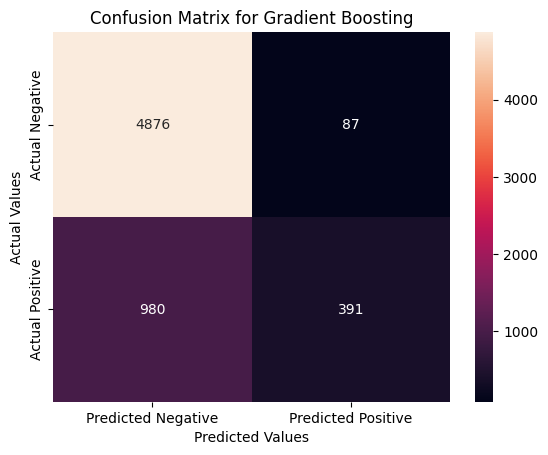

In [56]:
y_pred_gbc = pipe4.predict(x_test)
gbc_accuracy = round(accuracy_score(y_test, y_pred_gbc),2)
print('Accuracy', gbc_accuracy,'%')

classification_rep = classification_report(y_test, y_pred_gbc)
print("Classification Report:\n", classification_rep)

confusion = confusion_matrix(y_test, y_pred_gbc)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix for Gradient Boosting")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()



## Since Gradient Boosting did perform well on our dataset we would use it to tunning

In [57]:

# Define pipeline with Gradient Boosting Classifier
pipe4 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

# Define parameter grid for grid search
param_grid = {
    "classifier__learning_rate": (0.01, 0.1, 1, 10),
    "classifier__max_depth": (3, 10, None),
    "classifier__n_estimators": (50, 100, 200)
}

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(pipe4, param_grid=param_grid, cv=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('imputation_consatnt',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Home',
                                                                          'Intent',
                                                                          'Default']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('imputation_mean',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Rate',
                                                                          'Emp_length'])])),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': (0.01, 0.1, 1, 10),
                         'classifier__max_depth': (3, 10, None),
                         'classifier__n_estimators': (50, 100, 200)})

In [58]:
y_pred_grid_search = grid_search.predict(x_test)
gs_accuracy = round(accuracy_score(y_test, y_pred_grid_search),2)
print('Accuracy', gs_accuracy,'%')

Accuracy 0.84 %


In [64]:

import joblib

# Save the model using joblib
joblib.dump(grid_search, 'gbgs_model.joblib')

['gbgs_model.joblib']

In [71]:
import joblib


# Use a raw string for the file path
model_path = r'E:\VS Code\Grand_Project\notebook\gbgs_model.joblib'
model = joblib.load(model_path)


In [72]:
model.predict(x_test)[6]

0

In [73]:
cols=list(x_test.columns)
print(len(cols))
values=[[36],	[62000],	["MORTGAGE"],[9.0],	["EDUCATION"]	,[4800],	[8.00],	[0.08],	["N"],	[12]]
# pd.DataFrame(np.array(values).reshape(-1,1),cols)
inputs=pd.DataFrame(dict(zip(cols,values)))
# data={"Age":[36],"Income":[62000]}
# pd.DataFrame(data)
# dict(zip(cols,values))
inputs

9


,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default
0,36,62000,MORTGAGE,9.0,EDUCATION,4800,8.0,0.08,N


In [74]:
model.predict(inputs)[0]

0